# **งานวิจัย เรื่อง การพยากรณ์ผลผลิตข้าวนาปรังในภาคตะวันออกเฉียงเหนือของประเทศไทย**

รายชื่อผู้ทำงานวิจัย
1. 64122250033 นาย ศิรา จิตใจฉ่ำ
2. 64122250054 นาย เกษมสันต์ ชัยรัตน์
3. 64122250057 นางสาว ธัญญวรรณ ส่งเสริม

Datasets => [CLICK ME](https://github.com/Kasemsan054/LabCSD2301)

# นำเข้าไลบรารี่

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import folium
import geopandas as gpd
import random
%matplotlib inline

# ข้อมูล

## ข้อมูลปริมาณการผลิตข้าวนาปรัง

### ผลผลิตข้าวนาปรัง ปี 2564

In [ ]:
rice_2564 = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B9%80%E0%B8%A8%E0%B8%A3%E0%B8%A9%E0%B8%90%E0%B8%81%E0%B8%B4%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%20%20%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%84%E0%B9%89%E0%B8%B2%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%99%E0%B8%B2%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%87%202564.csv')
rice_2564.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18


### ผลผลิตข้าวนาปรัง ปี 2565

In [ ]:
rice_2565 = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B9%80%E0%B8%A8%E0%B8%A3%E0%B8%A9%E0%B8%90%E0%B8%81%E0%B8%B4%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%20%20%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%84%E0%B9%89%E0%B8%B2%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%99%E0%B8%B2%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%87%202565.csv')
rice_2565.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"529,854",10%,"723,071",732.78
1,อยุธยา,"377,129",7%,"532,981",707.58
2,พิจิตร,"316,003",6%,"495,427",637.84
3,พิษณุโลก,"311,253",6%,"524,171",593.80
4,นครสวรรค์,"233,886",4%,"351,734",664.95


## ข้อมูลปริมาณน้ำฝนประเทศไทย ในแต่ละจังหวัด

In [ ]:
rain = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%8A%E0%B8%B8%E0%B8%94%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B8%9D%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2.csv')
rain.head()

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม


# การกรองข้อมูล

## ชุดข้อมูลการผลิตข้าวนาปรัง

### ตรวจหาความผิดปกติของข้อมูลเบื้องต้น

In [ ]:
rice_2564.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           71 non-null     object 
 1   ผลผลิต(ตัน)                       71 non-null     object 
 2   สัดส่วน                           71 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           71 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  71 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [ ]:
rice_2565.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           72 non-null     object 
 1   ผลผลิต(ตัน)                       72 non-null     object 
 2   สัดส่วน                           72 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           72 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  72 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


### นำข้อมูลมารวมกันเป็นข้อมูลชุดเดียวกัน

In [ ]:
rices = pd.concat([rice_2564, rice_2565], ignore_index=True)
rices

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18
...,...,...,...,...,...
138,ชุมพร,351,0%,711,493.67
139,แม่ฮ่องสอน,83,0%,149,557.05
140,กระบี่,43,0%,97,443.30
141,ตรัง,12,0%,30,400.00


### เปลี่ยนชื่อคอลัมน์ใหม่

In [ ]:
rices.columns

Index(['จังหวัด', 'ผลผลิต(ตัน)', 'สัดส่วน', 'เนื้อที่เก็บเกี่ยว(ไร่)',
       'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'],
      dtype='object')

In [ ]:
rices.rename(columns = {'จังหวัด' : 'ProvinceName', 'ผลผลิต(ตัน)' : 'Prod', 'สัดส่วน' : 'Prop', 'เนื้อที่เก็บเกี่ยว(ไร่)' : 'HarvArea',
       'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)' : 'ProdPerHarvArea'}, inplace = True)
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18
...,...,...,...,...,...
138,ชุมพร,351,0%,711,493.67
139,แม่ฮ่องสอน,83,0%,149,557.05
140,กระบี่,43,0%,97,443.30
141,ตรัง,12,0%,30,400.00


### แปลงข้อมูล จาก object เป็น numerical

In [ ]:
# กำจัดเครื่องหมาย (,) และเปลี่ยนชนิดข้อมูลให้เป็น float
rices['Prod'] = rices['Prod'].str.replace(',', '').astype(float)
rices['HarvArea'] = rices['HarvArea'].str.replace(',', '').astype(float)

In [ ]:
rices.dtypes

ProvinceName        object
Prod               float64
Prop                object
HarvArea           float64
ProdPerHarvArea    float64
dtype: object

In [ ]:
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
0,สุพรรณบุรี,603384.0,10%,820261.0,735.60
1,อยุธยา,461714.0,7%,647718.0,712.83
2,นครสวรรค์,346383.0,6%,521396.0,664.34
3,พิจิตร,307387.0,5%,469754.0,654.36
4,พิษณุโลก,278354.0,5%,454696.0,612.18
...,...,...,...,...,...
138,ชุมพร,351.0,0%,711.0,493.67
139,แม่ฮ่องสอน,83.0,0%,149.0,557.05
140,กระบี่,43.0,0%,97.0,443.30
141,ตรัง,12.0,0%,30.0,400.00


### ลบแถวข้อมูลที่ผิดปกติเกินเหตุ (Over Outlier)

In [ ]:
rices = rices[(rices['Prod'] > 10000) & (rices['Prod'] < 100000)]
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
23,อ่างทอง,99868.0,2%,154160.0,647.82
24,สระบุรี,95702.0,2%,146284.0,654.22
25,ขอนแก่น,79951.0,1%,138243.0,578.34
26,อุบลราชธานี,79618.0,1%,165902.0,479.91
27,ปราจีนบุรี,77814.0,1%,124479.0,625.12
...,...,...,...,...,...
116,พัทลุง,15056.0,0%,28049.0,536.77
117,หนองบัวลำภู,13649.0,0%,27119.0,503.30
118,สุรินทร์,13601.0,0%,29301.0,464.18
119,ปัตตานี,12268.0,0%,20245.0,605.98


## ข้อมูลปริมาณน้ำฝน

### ตรวจหาความผิดปกติของข้อมูลเบื้องต้น

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


### เลือกข้อมูลปริมาณน้ำฝนช่วงปี 2021 - 2022

In [ ]:
# ตัดชุดข้อมูล เอาข้อมูลตั้งแต่มี ค.ศ.2019 - 2021
rain_2021to2022 = rain[(rain['Year'] >= 2021) & (rain['Year'] <= 2022)]
rain_2021to2022

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
2772,10,กรุงเทพมหานคร,Bangkok,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2773,11,สมุทรปราการ,Samut Prakan,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2774,12,นนทบุรี,Nonthaburi,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2775,13,ปทุมธานี,Pathum Thani,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2776,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4230,92,ตรัง,Trang,158.050003,433.649994,293.423136,ใต้,2022,7,1/7/22,กรกฎาคม
4231,93,พัทลุง,Phatthalung,101.309998,264.140015,144.777569,ใต้,2022,7,1/7/22,กรกฎาคม
4232,94,ปัตตานี,Pattani,127.589996,214.440002,172.280939,ใต้,2022,7,1/7/22,กรกฎาคม
4233,95,ยะลา,Yala,122.440002,189.169998,148.495964,ใต้,2022,7,1/7/22,กรกฎาคม


### รวมกลุ่มข้อมูลปริมาณน้ำฝนจากรายเดือนเป็นรายปี ตาม ปี, รหัสจังหวัด, ชื่อจังหวัด, ภูมิภาค, ปริมาณน้ำฝนต่ำสุด, ปริมาณน้ำฝนสูงสุด และหาผลรวมของค่าเฉลี่ยน้ำฝน

In [ ]:
grouped_rain = rain_2021to2022.groupby(['Year','ProvinceID','ProvinceName','region','MinRain','MaxRain'])['AvgRain'].sum().reset_index()
grouped_rain['AvgRain'] = grouped_rain['AvgRain'] / 12
grouped_rain

,Year,ProvinceID,ProvinceName,region,MinRain,MaxRain,AvgRain
0,2021,10,กรุงเทพมหานคร,กลาง,0.000000,0.000000,0.000000
1,2021,10,กรุงเทพมหานคร,กลาง,0.000000,2.300000,0.048460
2,2021,10,กรุงเทพมหานคร,กลาง,0.070000,102.580002,2.801416
3,2021,10,กรุงเทพมหานคร,กลาง,0.380000,169.699997,5.496234
4,2021,10,กรุงเทพมหานคร,กลาง,2.820000,88.070000,4.109688
...,...,...,...,...,...,...,...
1457,2022,96,นราธิวาส,ใต้,133.869995,177.289993,12.969654
1458,2022,96,นราธิวาส,ใต้,146.039993,238.490005,16.480889
1459,2022,96,นราธิวาส,ใต้,179.100006,230.690002,16.983806
1460,2022,96,นราธิวาส,ใต้,232.500000,248.199997,19.948646


### ผสานชุดข้อมูลข้าวนาปรังกับข้อมูลปริมาณน้ำฝนเข้าด้วยกัน

In [ ]:
merged_complete = rices.merge(grouped_rain, on=['ProvinceName'])
merged_complete

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea,Year,ProvinceID,region,MinRain,MaxRain,AvgRain
0,อ่างทอง,99868.0,2%,154160.0,647.82,2021,15,กลาง,0.000000,0.000000,0.000000
1,อ่างทอง,99868.0,2%,154160.0,647.82,2021,15,กลาง,0.550000,2.570000,0.172972
2,อ่างทอง,99868.0,2%,154160.0,647.82,2021,15,กลาง,1.110000,11.880000,0.425131
3,อ่างทอง,99868.0,2%,154160.0,647.82,2021,15,กลาง,2.190000,12.310000,0.664285
4,อ่างทอง,99868.0,2%,154160.0,647.82,2021,15,กลาง,13.050000,68.949997,3.601386
...,...,...,...,...,...,...,...,...,...,...,...
1154,ปัตตานี,12268.0,0%,20245.0,605.98,2022,94,ใต้,99.699997,163.080002,9.998230
1155,ปัตตานี,12268.0,0%,20245.0,605.98,2022,94,ใต้,113.500000,213.740005,12.824139
1156,ปัตตานี,12268.0,0%,20245.0,605.98,2022,94,ใต้,127.589996,214.440002,14.356745
1157,ปัตตานี,12268.0,0%,20245.0,605.98,2022,94,ใต้,220.179993,242.669998,19.033021


### เลือกภูมิภาคเฉพาะภาคที่สนใจ (ภาคตะวันออกเฉียงเหนือ)


In [ ]:
merged_complete = merged_complete[merged_complete['region'] == 'ตะวันออกเฉียงเหนือ']
# merged_complete['ProvinceName']

### ภาพแผนที่จังหวัดที่เลือก จากภูมิภาคที่สนใจในประเทศไทย

In [ ]:
# โหลดข้อมูล GeoJSON for Thailand provinces
thailand_provinces = gpd.read_file('https://raw.githubusercontent.com/chingchai/OpenGISData-Thailand/master/provinces.geojson')

# สร้างแผนที่ ด้วย Folium
coordinate = (11.348381898597856, 99.32311640203335)
mapTH = folium.Map(location=coordinate, zoom_start=6)

# เพิ่มการปักหมุด
locations = {
    'ขอนแก่น': {'location': (15.966308929745209, 102.65769316605649),},
    'อุบลราชธานี': {'location': (15.076154524069446, 105.23603027936284),},
    'ชัยภูมิ': {'location': (16.00591444105099, 101.88315708110616),},
    'หนองคาย': {'location': (17.772060849980154, 102.75146213453867),},
    'ยโสธร': {'location': (16.136383105435208, 104.37925643727407),},
    'นครพนม': {'location': (17.409211335152218, 104.56001445455496),},
    'ศรีสะเกษ': {'location': (14.76335547970714, 104.47780126725567),},
    'สกลนคร': {'location': (17.38740110141821, 103.73975992035393),},
    'อุดรธานี': {'location': (17.44527568016101, 102.98447964851356),},
    'บุรีรัมย์': {'location': (14.849593865679747, 102.98059820839795),},
    'สุรินทร์': {'location': (15.170590560085644, 103.72354860194073),},
    'หนองบัวลำภู': {'location': (17.19460044721073, 102.36386121307414),},
}

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # Generate a random color in hex format
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    thailand_provinces,
    name='geojson',
    style_function=style_function
).add_to(mapTH)

selected_provices = thailand_provinces["pro_th"].isin(merged_complete["ProvinceName"])
complete_geojson = thailand_provinces[selected_provices]

for label, info in locations.items():
    location = info['location']
    popup_text = label.replace("\n", "<br>")
    folium.Marker(location=location, popup=popup_text, icon=folium.Icon(icon='map-marker', color='red')).add_to(mapTH)

# แสดงแผนที่
mapTH

### ส่งออกข้อมูลหลังจากผสานข้อมูลทั้งหมดเข้าด้วยกันแล้ว เป็นไฟล์ .csv

In [ ]:
merged_complete.to_csv("rices.csv")

## เลือก Features ที่จำเป็นในการวิเคราะห์

In [ ]:
complete_df = merged_complete[['Prod','HarvArea','MinRain','MaxRain','AvgRain']]
complete_df

,Prod,HarvArea,MinRain,MaxRain,AvgRain
76,79951.0,138243.0,0.000000,0.000000,0.000000
77,79951.0,138243.0,0.000000,4.680000,0.042587
78,79951.0,138243.0,0.000000,7.080000,0.059706
79,79951.0,138243.0,17.139999,46.450001,2.229962
80,79951.0,138243.0,30.309999,92.279999,5.672085
...,...,...,...,...,...
983,13649.0,27119.0,54.599998,115.589996,6.290115
984,13649.0,27119.0,55.900002,80.440002,5.554963
985,13649.0,27119.0,96.019997,158.009995,10.096998
986,13649.0,27119.0,127.040001,210.309998,12.810828


### การหาค่า outlier และการกำจัดค่า outlier


In [ ]:
def IQR_Outlier_Detection(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound, lower_bound

In [ ]:
def fillNull(df, col):
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [ ]:
def outlierToNull(df, col, upper, lower):
    df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)

In [ ]:
# !edit def outlier
def complete_outlier(df, col):
    print('')
    upper_limit, lower_limit = IQR_Outlier_Detection(df, col)
    outlierToNull(df, col, upper_limit, lower_limit)
    fillNull(df, col)

In [ ]:
complete_df.head(5)

,Prod,HarvArea,MinRain,MaxRain,AvgRain
76,79951.0,138243.0,0.000000,0.000000,0.000000
77,79951.0,138243.0,0.000000,4.680000,0.042587
78,79951.0,138243.0,0.000000,7.080000,0.059706
79,79951.0,138243.0,17.139999,46.450001,2.229962
80,79951.0,138243.0,30.309999,92.279999,5.672085


### Outlier Prod

<Axes: ylabel='Prod'>

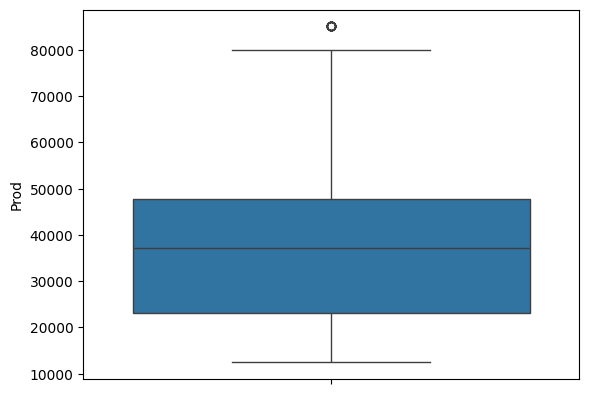

In [ ]:
sns.boxplot(complete_df['Prod'])

In [ ]:
complete_outlier(complete_df, 'Prod')

<ipython-input-25-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-24-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier HarvArea

<Axes: ylabel='HarvArea'>

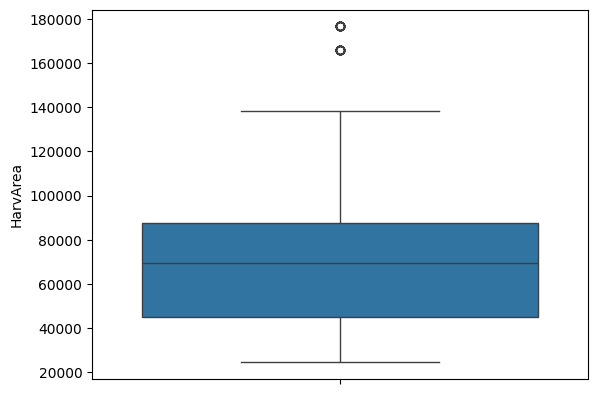

In [ ]:
sns.boxplot(complete_df['HarvArea'])

In [ ]:
complete_outlier(complete_df, 'HarvArea')

<ipython-input-25-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-24-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier MinRain

<Axes: ylabel='MinRain'>

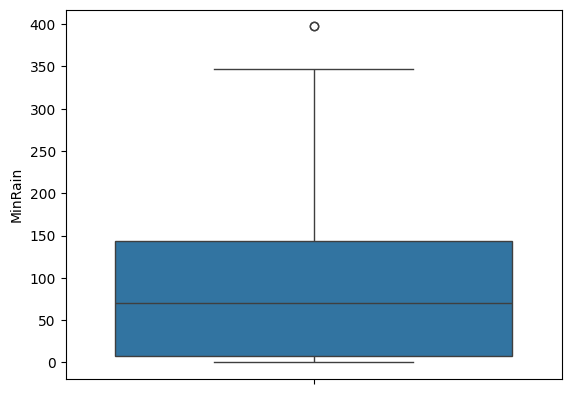

In [ ]:
sns.boxplot(complete_df['MinRain'])

In [ ]:
complete_outlier(complete_df, 'MinRain')

<ipython-input-25-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-24-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier MaxRain

<Axes: ylabel='MaxRain'>

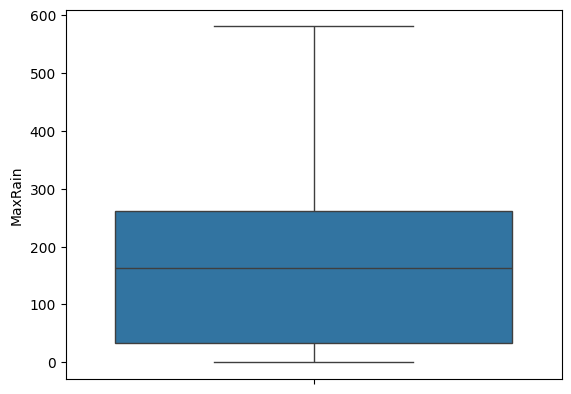

In [ ]:
sns.boxplot(complete_df['MaxRain'])

In [ ]:
complete_outlier(complete_df, 'MaxRain')

<ipython-input-25-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-24-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier AvgRain

<Axes: ylabel='AvgRain'>

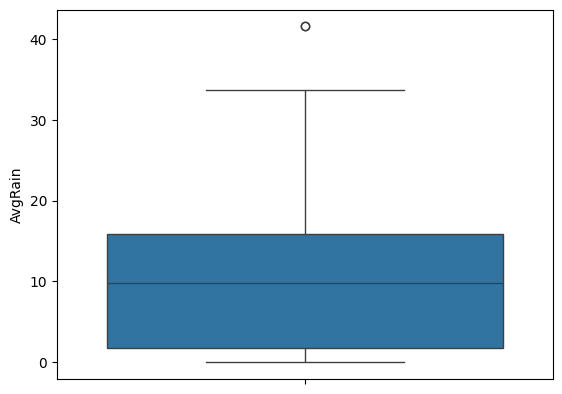

In [ ]:
sns.boxplot(complete_df['AvgRain'])

In [ ]:
complete_outlier(complete_df, 'AvgRain')

<ipython-input-25-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-24-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


# หาความสัมพันธ์ของข้อมูลระหว่าง Features

In [ ]:
complete_df.corr()

,Prod,HarvArea,MinRain,MaxRain,AvgRain
Prod,1.000000,0.886743,0.032615,-0.019943,0.000119
HarvArea,0.886743,1.000000,0.029405,-0.002828,0.005079
MinRain,0.032615,0.029405,1.000000,0.902700,0.969497
MaxRain,-0.019943,-0.002828,0.902700,1.000000,0.959525
AvgRain,0.000119,0.005079,0.969497,0.959525,1.000000


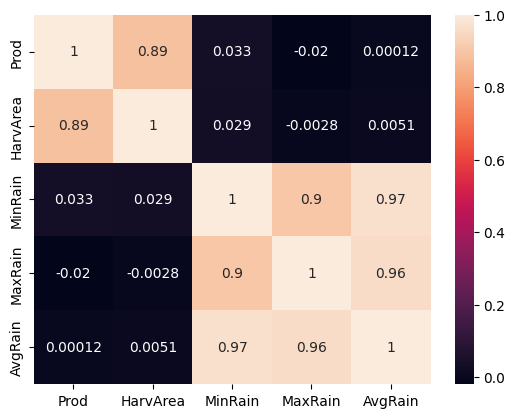

In [ ]:
sns.heatmap(complete_df.corr(), annot=True)
plt.show()

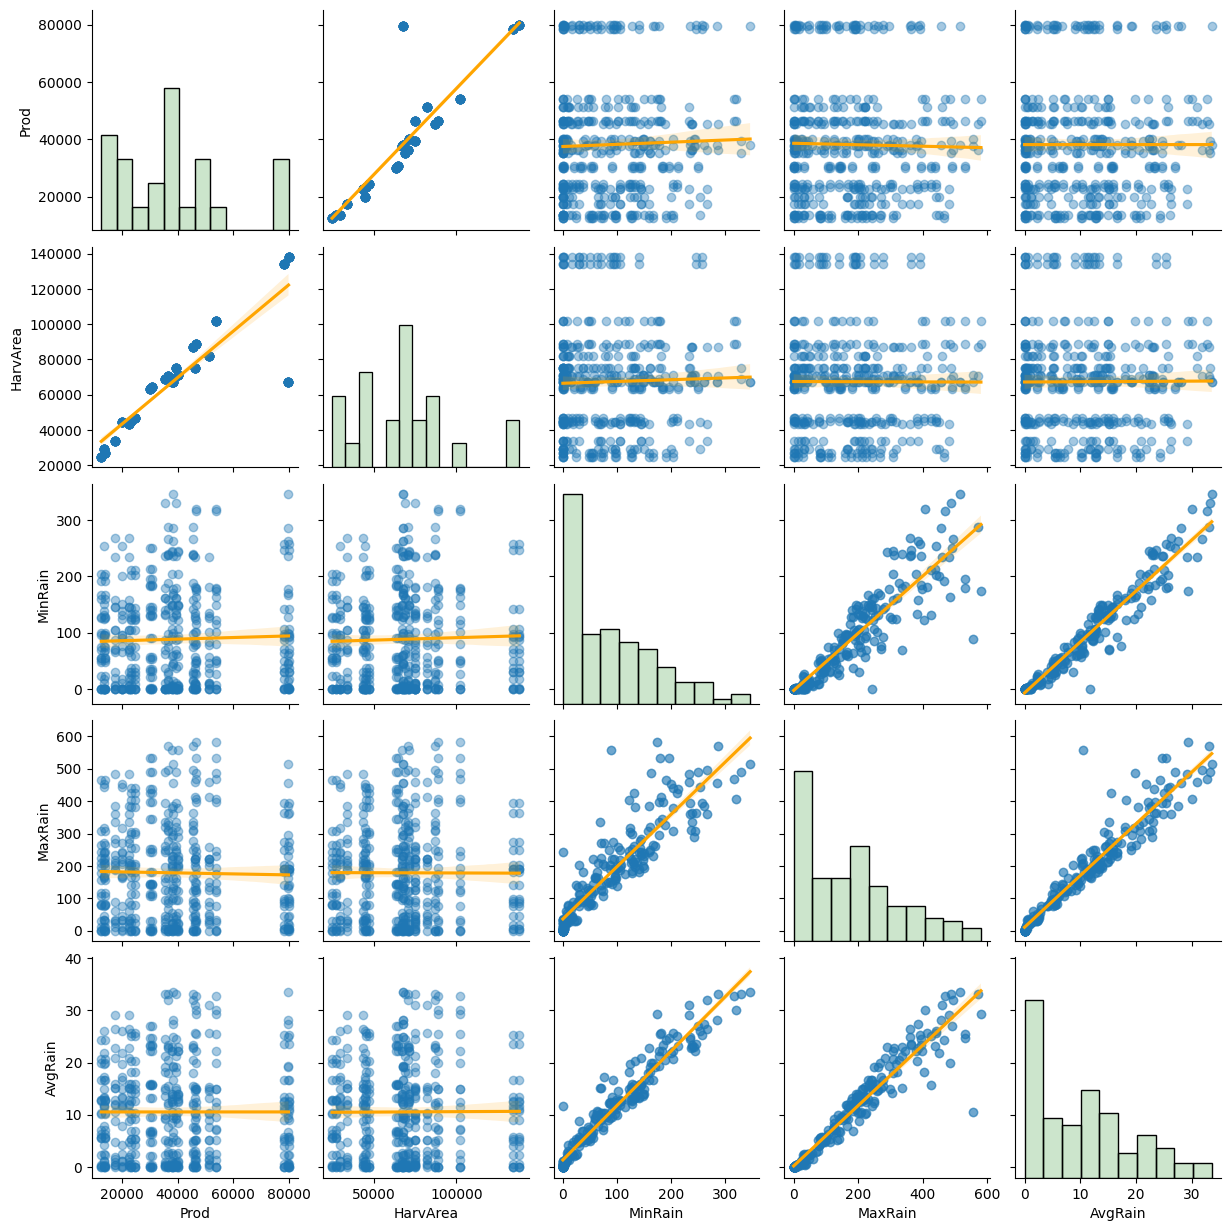

In [ ]:
sns.pairplot(complete_df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': .4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

# แบ่งชุดข้อมูลออกเป็นชุดฝึกอบรมและชุดทดสอบ (Split data into training and testing sets)

In [ ]:
X = complete_df[['HarvArea','MinRain','MaxRain','AvgRain']]  # Features
y = complete_df['Prod'] # target

In [ ]:
X

,HarvArea,MinRain,MaxRain,AvgRain
76,138243.0,0.000000,0.000000,0.000000
77,138243.0,0.000000,4.680000,0.042587
78,138243.0,0.000000,7.080000,0.059706
79,138243.0,17.139999,46.450001,2.229962
80,138243.0,30.309999,92.279999,5.672085
...,...,...,...,...
983,27119.0,54.599998,115.589996,6.290115
984,27119.0,55.900002,80.440002,5.554963
985,27119.0,96.019997,158.009995,10.096998
986,27119.0,127.040001,210.309998,12.810828


In [ ]:
y

76     79951.0
77     79951.0
78     79951.0
79     79951.0
80     79951.0
        ...   
983    13649.0
984    13649.0
985    13649.0
986    13649.0
987    13649.0
Name: Prod, Length: 456, dtype: float64

In [ ]:
# แบ่งชุดข้อมูลฝึกสอน 80% และ ชุดข้อมูลทดสอบ 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# สร้างโมเดลจำลอง

## K-Nearest Neighbors Regression (KNN-R)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

### ทำ Normalization ข้อมูล (Normalization Data)

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.00806021, 0.00126714],
       [1.        , 0.        , 0.01219365, 0.0017765 ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.05886709, 0.01163398],
       [0.        , 0.00161383, 0.03923325, 0.02716003]])

In [ ]:
X_test_scaled

array([[ 0.00000000e+00,  1.50144093e-02,  1.03146580e-01,
         4.33710247e-02],
       [ 0.00000000e+00,  2.25072044e-02,  5.28908235e-02,
         5.37068072e-02],
       [ 0.00000000e+00,  1.89193088e-01,  3.58920469e-01,
         3.13472638e-01],
       [ 0.00000000e+00,  1.98040349e-01,  5.75891707e-01,
         4.51223067e-01],
       [ 0.00000000e+00,  3.02622484e-01,  3.22787311e-01,
         3.51015133e-01],
       [ 0.00000000e+00,  3.04236310e-01,  3.76143141e-01,
         3.81126406e-01],
       [ 0.00000000e+00,  4.18904901e-01,  4.03682203e-01,
         4.70961709e-01],
       [ 0.00000000e+00,  4.19625362e-01,  4.87057137e-01,
         6.23070403e-01],
       [ 0.00000000e+00,  7.70720468e-01,  6.19310048e-01,
         7.84812687e-01],
       [ 0.00000000e+00,  1.23919310e-03,  2.30611581e-02,
         1.06477389e-02],
       [ 0.00000000e+00,  5.51008670e-02,  1.55451839e-01,
         1.39362349e-01],
       [ 0.00000000e+00,  8.76368872e-02,  3.48104634e-01,
      

### สร้างโมเดล

In [ ]:
knnr = KNeighborsRegressor(n_neighbors = 8, metric='euclidean')
knnr.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=8)

Text(0.5, 1.0, 'ELBOW PLOT')

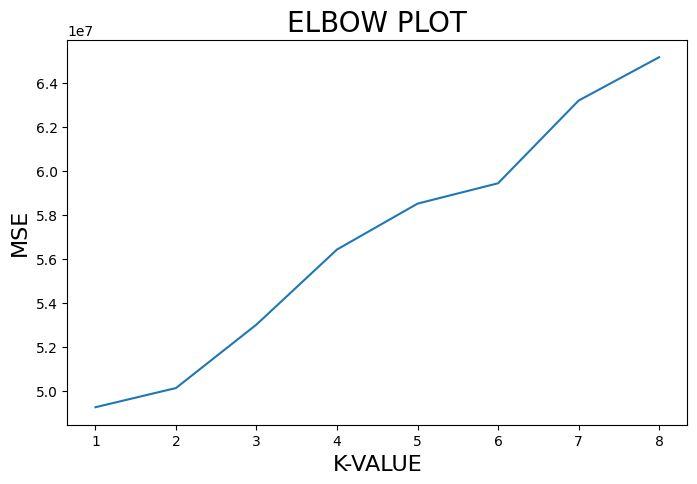

In [ ]:
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(8,5))
k_list = np.arange(1, 9, 1)
knn_dict = {} # To store k and mae pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(X_train_scaled, y_train)
    y_knn_pred = model_knn.predict(X_test_scaled)
#Storing MSE
    mse = mean_squared_error(y_test, y_knn_pred)
    knn_dict[i] = mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=16)
ax.set_ylabel('MSE' ,fontsize=16)
ax.set_title('ELBOW PLOT' ,fontsize=20)

### การพยากรณ์

**ชุดข้อมูลฝึกฝน**

In [ ]:
y_pred_train = knnr.predict(X_train)
y_pred_train

array([79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
      

**ชุดข้อมูลทดสอบ**

In [ ]:
y_pred_test = knnr.predict(X_test)
y_pred_test

array([20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       23252., 23252., 23252., 23252., 23252., 23252., 23252., 23252.,
       23252., 23252., 23252., 23252., 23252., 23252., 23252., 23252.,
       23252., 23252., 23252., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664., 20664., 20664., 20664., 20664.,
       20664., 20664., 20664., 20664.])

In [ ]:
y_pred = knnr.predict(X)
y_pred

array([79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 79951.        ,
       79951.        , 79951.        , 79951.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 78367.        , 78367.        ,
       78367.        , 78367.        , 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
       58914.56521739, 58914.56521739, 58914.56521739, 58914.56521739,
      

**ชุดข้อมูล X**

In [ ]:
complete_df['Predicted_Prod'] = knnr.predict(X)
complete_df

<ipython-input-54-a4dcf3a8ac5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df['Predicted_Prod'] = knnr.predict(X)


,Prod,HarvArea,MinRain,MaxRain,AvgRain,Predicted_Prod
76,79951.0,138243.0,0.000000,0.000000,0.000000,79951.0
77,79951.0,138243.0,0.000000,4.680000,0.042587,79951.0
78,79951.0,138243.0,0.000000,7.080000,0.059706,79951.0
79,79951.0,138243.0,17.139999,46.450001,2.229962,79951.0
80,79951.0,138243.0,30.309999,92.279999,5.672085,79951.0
...,...,...,...,...,...,...
983,13649.0,27119.0,54.599998,115.589996,6.290115,20664.0
984,13649.0,27119.0,55.900002,80.440002,5.554963,20664.0
985,13649.0,27119.0,96.019997,158.009995,10.096998,20664.0
986,13649.0,27119.0,127.040001,210.309998,12.810828,20664.0


In [ ]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

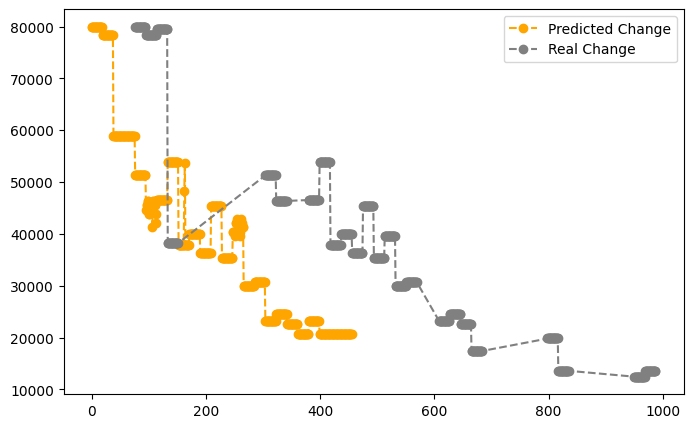

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change',
         linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change',
         linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

### การประเมินผลโมเดล

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"R-squared: {round(r2,2)}")
    print(f"Mean Square Error: {round(mse,2)}")
    print(f"Root Mean Square Error: {round(rmse,2)}")
    print("")
    toRe = {
      'modelName' : model_name,
      'r2' : r2,
      'mse' : mse,
      'rmse' : rmse,
    }
    return toRe

**ชุดข้อมูลฝึกฝน**

In [ ]:
KNNR_report = evaluate_model(y_train, y_pred_train, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.85
Mean Square Error: 46260190.62
Root Mean Square Error: 6801.48



Text(0, 0.5, 'Actual')

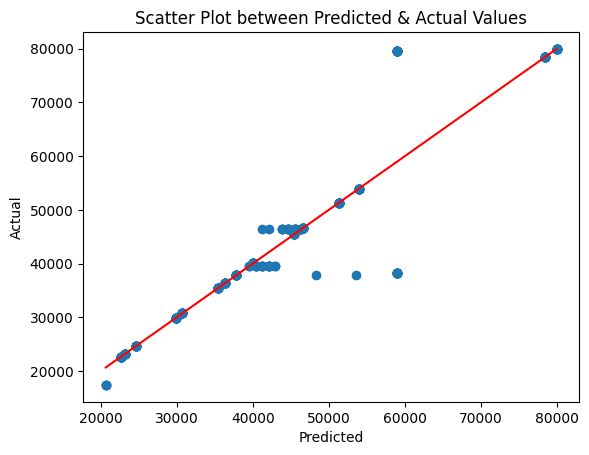

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ**

In [ ]:
evaluate_model(y_test, y_pred_test, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: -3.91
Mean Square Error: 38638744.65
Root Mean Square Error: 6216.01



{'modelName': 'K-Nearest Neighbors Regression',
 'r2': -3.9115917940722245,
 'mse': 38638744.652173914,
 'rmse': 6216.00713096228}

Text(0, 0.5, 'Actual')

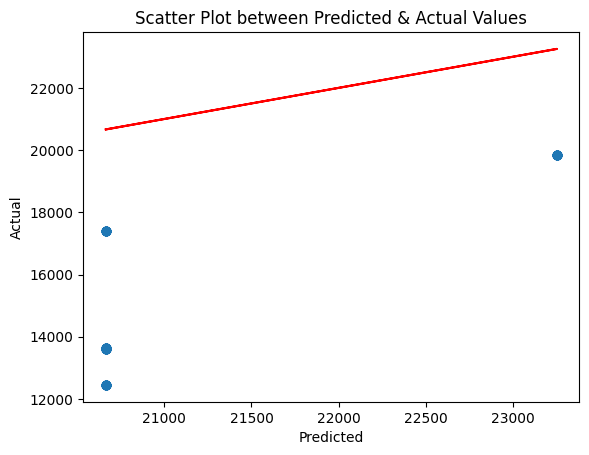

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Multiple Linear Regression (MLR)

### สร้างโมเดล

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# ค่าจุดตัดแกน Y ของสมการ
reg.intercept_

1076.254555769221

In [ ]:
# ค่าสัมประสิทธิ์การถดถอยของตัวตอบสนอง X
reg.coef_

array([  0.56993971,  32.69423771, -19.97080234,   5.84024243])

### การพยากรณ์

**ชุดข้อมูลฝึกฝน**

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([79866.42977256, 79773.21514044, 79725.38519201, 79512.18872476,
       79047.61283698, 78358.23877604, 79425.00301576, 79221.8671351 ,
       79323.31238564, 78430.41743835, 80749.40616241, 80610.69746622,
       79618.06135054, 79300.71521972, 79171.28862339, 79807.83097743,
       78715.33328673, 77502.09614925, 80790.45221876, 77654.49376122,
       77561.2791291 , 77513.44918067, 77300.25271342, 76835.67682564,
       76146.30276469, 77213.06700442, 77009.93112376, 77111.3763743 ,
       76218.48142701, 78537.47015107, 78398.76145487, 77406.1253392 ,
       77088.77920837, 76959.35261205, 77595.89496608, 76503.39727538,
       75290.16013791, 78578.51620741, 39469.93218878, 39372.77861238,
       39387.69061741, 39294.26125791, 39131.84341094, 38995.86554395,
       40052.3180384 , 40380.22351113, 39956.89124847, 39488.62506846,
       40122.87847882, 40726.5531015 , 39431.50027459, 39127.43429195,
       38358.75362563, 38224.85478089, 40036.29638844, 40490.68235291,
      

**ชุดข้อมูลทดสอบ**

In [ ]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([19203.32805777, 19873.10983806, 18266.52066612, 15878.00824858,
       19979.72221286, 19385.24589267, 20384.44961847, 19455.69334464,
       21937.02169691, 19969.26883854, 19070.43315302, 17229.18086644,
       17199.36213087, 19368.78486992, 17875.22783462, 18425.84320068,
       26418.05378495, 26347.14724512, 25771.06997535, 25760.21004567,
       25875.28548782, 25344.23332063, 26325.70227223, 24240.5857512 ,
       26700.11587021, 26771.55600509, 26649.45233821, 26048.75652606,
       26176.48477167, 21611.80480467, 25455.33073734, 23622.8050235 ,
       25059.30189889, 26252.21963205, 24072.03756152, 17776.05797458,
       17705.15143475, 17129.07416498, 17118.2142353 , 17233.28967745,
       16702.23751027, 17683.70646187, 15598.58994083, 18058.12005985,
       18129.56019473, 18007.45652785, 17406.7607157 , 17534.48896131,
       12969.8089943 , 16813.33492698, 14980.80921314, 16417.30608853,
       17610.22382169, 15430.04175116, 15050.60628526, 15050.40657864,
      

**ชุดข้อมูล X**

In [ ]:
y_pred = reg.predict(X)
y_pred

array([79866.42977256, 79773.21514044, 79725.38519201, 79512.18872476,
       79047.61283698, 78358.23877604, 79425.00301576, 79221.8671351 ,
       79323.31238564, 78430.41743835, 80749.40616241, 80610.69746622,
       79618.06135054, 79300.71521972, 79171.28862339, 79807.83097743,
       78715.33328673, 77502.09614925, 80790.45221876, 77654.49376122,
       77561.2791291 , 77513.44918067, 77300.25271342, 76835.67682564,
       76146.30276469, 77213.06700442, 77009.93112376, 77111.3763743 ,
       76218.48142701, 78537.47015107, 78398.76145487, 77406.1253392 ,
       77088.77920837, 76959.35261205, 77595.89496608, 76503.39727538,
       75290.16013791, 78578.51620741, 39469.93218878, 39372.77861238,
       39387.69061741, 39294.26125791, 39131.84341094, 38995.86554395,
       40052.3180384 , 40380.22351113, 39956.89124847, 39488.62506846,
       40122.87847882, 40726.5531015 , 39431.50027459, 39127.43429195,
       38358.75362563, 38224.85478089, 40036.29638844, 40490.68235291,
      

In [ ]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_mlr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

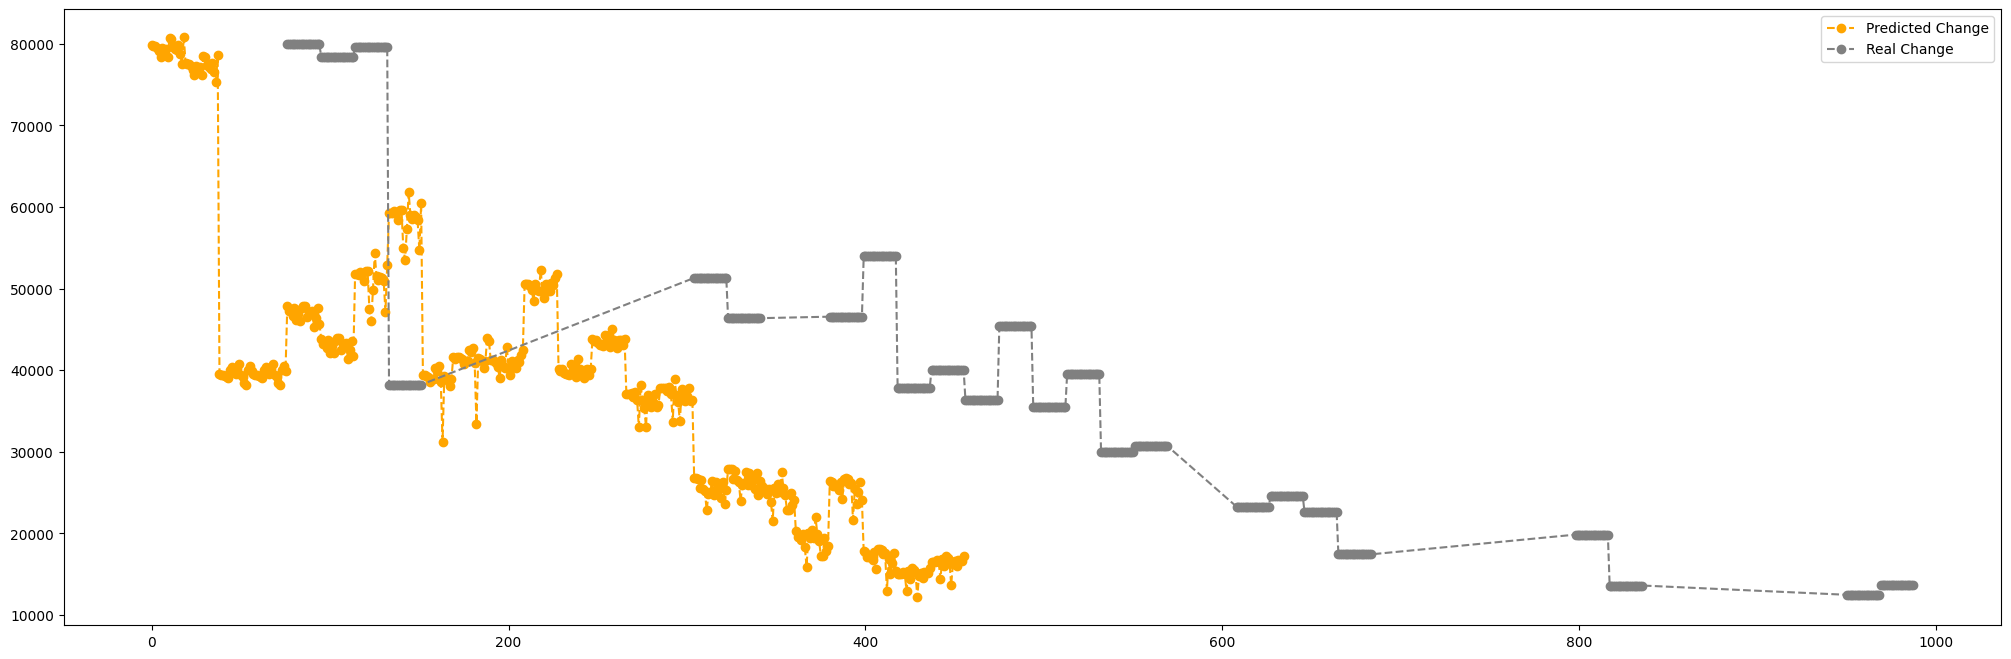

In [ ]:
plt.figure(figsize = (25, 8))
plt.plot(y_pred, label = 'Predicted Change', linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change', linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

### การประเมินผลโมเดล

**ชุดข้อมูลฝึกฝน**

In [ ]:
MLR_report = evaluate_model(y_train, y_pred_train, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 0.68
Mean Square Error: 98104943.63
Root Mean Square Error: 9904.79



Text(0, 0.5, 'Actual')

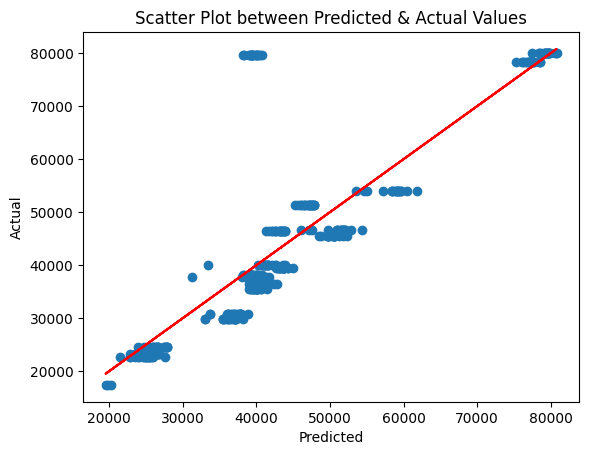

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ**

In [ ]:
evaluate_model(y_test, y_pred_test, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: -0.69
Mean Square Error: 13260382.45
Root Mean Square Error: 3641.48



{'modelName': 'Multiple Linear Regression',
 'r2': -0.685603045001107,
 'mse': 13260382.452656012,
 'rmse': 3641.4808049275794}

Text(0, 0.5, 'Actual')

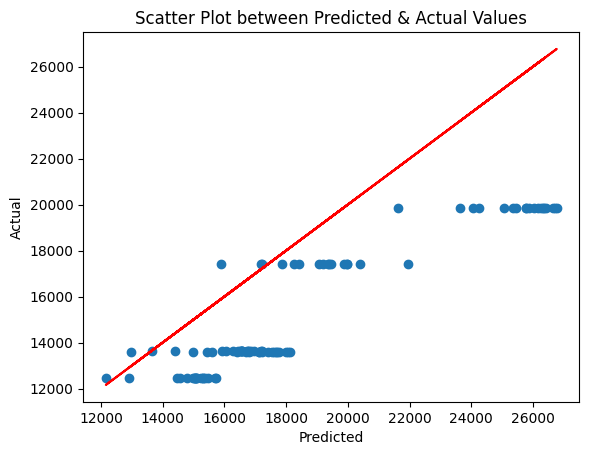

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# บทสรุปและการเปรียบเทียบ

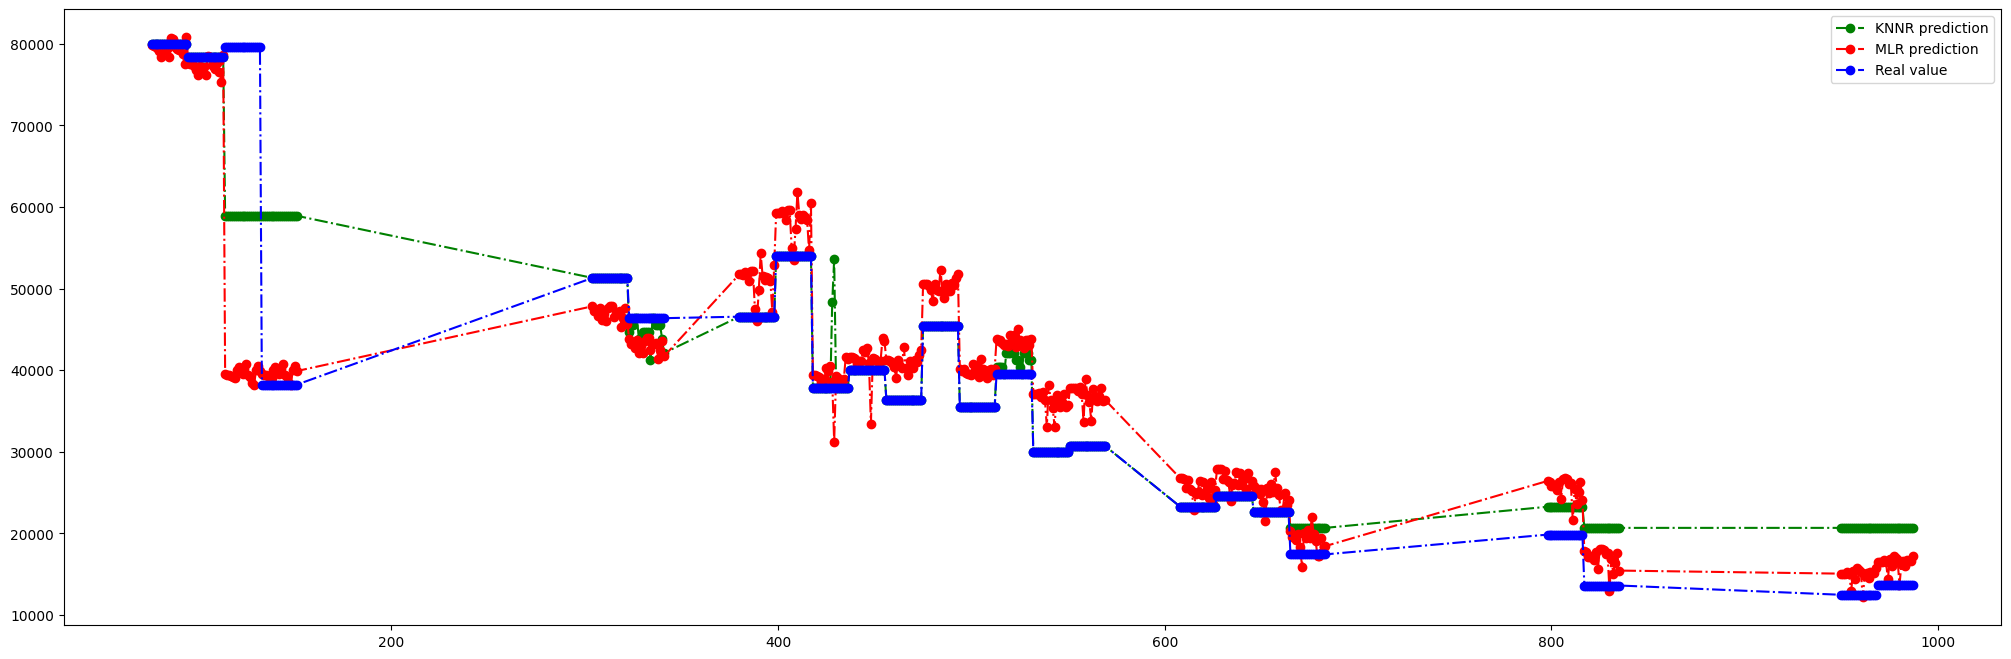

In [ ]:
plt.figure(figsize = (25, 8))
plt.plot(result_df_knnr['y_pred'], label = 'KNNR prediction', linestyle="-.",marker='o', color='green') # การเปลี่ยนแปลงที่คาดการณ์ไว้ KNNR
plt.plot(result_df_mlr['y_pred'], label = 'MLR prediction', linestyle="-.",marker='o', color='red') # การเปลี่ยนแปลงที่คาดการณ์ไว้ MLR
plt.plot(complete_df['Prod'], label = 'Real value', linestyle="-.", marker='o', color='blue') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

In [ ]:
def print_rep(report) :
  print('Model :', report['modelName'])
  print('R2 :', round(report['r2'], 2))
  print('MSE :', round(report['mse'], 2))
  print('RMSE :', round(report['rmse'], 2))

print_rep(KNNR_report)
print('--------------------------------------')
print_rep(MLR_report)

Model : K-Nearest Neighbors Regression
R2 : 0.85
MSE : 46260190.62
RMSE : 6801.48
--------------------------------------
Model : Multiple Linear Regression
R2 : 0.68
MSE : 98104943.63
RMSE : 9904.79
